# Delivery Time Prediction - Full EDA
> A clean, reproducible, and well-structured analysis of food delivery time dataset

Last run: November 26, 2025  
Authors:

---


In [2]:
import pandas as pd
import numpy as np


file_name = "/content/drive/MyDrive/MY_DATA_ANALYTICS_PROJECTS/delivery_time_project/data/raw/deliverytime.csv"

if file_name.endswith(".csv"):
    df = pd.read_csv(file_name)
else:
    df = pd.read_excel(file_name)

print("First 5 rows:")
print(df.head())

print("\nInfo before cleaning:")
print(df.info())



df = df.drop_duplicates()



numeric_cols = [
    "Delivery_person_Age",
    "Delivery_person_Ratings",
    "Restaurant_latitude",
    "Restaurant_longitude",
    "Delivery_location_latitude",
    "Delivery_location_longitude",
    "Time_taken(min)"
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="ignore")



for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])



text_cols = [
    "Type_of_order",
    "Type_of_vehicle",
    "Delivery_person_ID"
]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

print("\nUnique values after cleaning text columns:")
for col in text_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()[:5]}")



def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius (km)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

df["distance_km"] = df.apply(
    lambda row: haversine(
        row["Restaurant_latitude"],
        row["Restaurant_longitude"],
        row["Delivery_location_latitude"],
        row["Delivery_location_longitude"]
    ),
    axis=1
)

print("\nDistance calculation complete.")
print(df[["Time_taken(min)", "distance_km"]].head())



output_file = "/content/drive/MyDrive/MY_DATA_ANALYTICS_PROJECTS/delivery_time_project/data/processed/delivery_cleaned.xlsx"
df.to_excel(output_file, index=False)

print(f"\ndataset saved as: {output_file}")



First 5 rows:
     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken

/tmp/ipython-input-1561846950.py:36: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



Unique values after cleaning text columns:
Type_of_order: ['snack' 'drinks' 'buffet' 'meal']
Type_of_vehicle: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
Delivery_person_ID: ['indores13del02' 'bangres18del02' 'bangres19del01' 'coimbres13del02'
 'chenres12del01']

Distance calculation complete.
   Time_taken(min)  distance_km
0               24     3.025149
1               33    20.183530
2               26     1.552758
3               21     7.790401
4               30     6.210138

dataset saved as: /content/drive/MyDrive/MY_DATA_ANALYTICS_PROJECTS/delivery_time_project/data/processed/delivery_cleaned.xlsx


In [3]:
import pandas as pd


df_clean = pd.read_excel("/content/drive/MyDrive/MY_DATA_ANALYTICS_PROJECTS/delivery_time_project/data/processed/delivery_cleaned.xlsx")

print("Cleaned dataset loaded!")
print(df_clean.head())


Cleaned dataset loaded!
     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     indores13del02                   37                      4.9   
1  B379     bangres18del02                   34                      4.5   
2  5D6D     bangres19del01                   23                      4.4   
3  7A6A    coimbres13del02                   38                      4.7   
4  70A2     chenres12del01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

df = pd.read_excel("/content/drive/MyDrive/MY_DATA_ANALYTICS_PROJECTS/delivery_time_project/data/processed/delivery_cleaned.xlsx")

print(df.head())
print(df.info())


     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     indores13del02                   37                      4.9   
1  B379     bangres18del02                   34                      4.5   
2  5D6D     bangres19del01                   23                      4.4   
3  7A6A    coimbres13del02                   38                      4.7   
4  70A2     chenres12del01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0    

In [5]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),distance_km
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607,99.303911
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806,1099.731281
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000,1.465067
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000,4.663493
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000,9.264281
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000,13.763977
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000,19692.674606


In [6]:
df_clean = df[df["distance_km"] < 50]


time = df_clean["Time_taken(min)"].to_numpy()
distance = df_clean["distance_km"].to_numpy()

In [7]:
print("CLEANED NUMPY STATS FOR DELIVERY TIME (min):")
print("Mean:", np.mean(time))
print("Median:", np.median(time))
print("Std Dev:", np.std(time))

print("\nCLEANED NUMPY STATS FOR DISTANCE (km):")
print("Mean:", np.mean(distance))
print("Median:", np.median(distance))
print("Std Dev:", np.std(distance))

CLEANED NUMPY STATS FOR DELIVERY TIME (min):
Mean: 26.298038173685843
Median: 26.0
Std Dev: 9.383628655305532

CLEANED NUMPY STATS FOR DISTANCE (km):
Mean: 9.73539623640652
Median: 9.220209378254708
Std Dev: 5.608445488361437


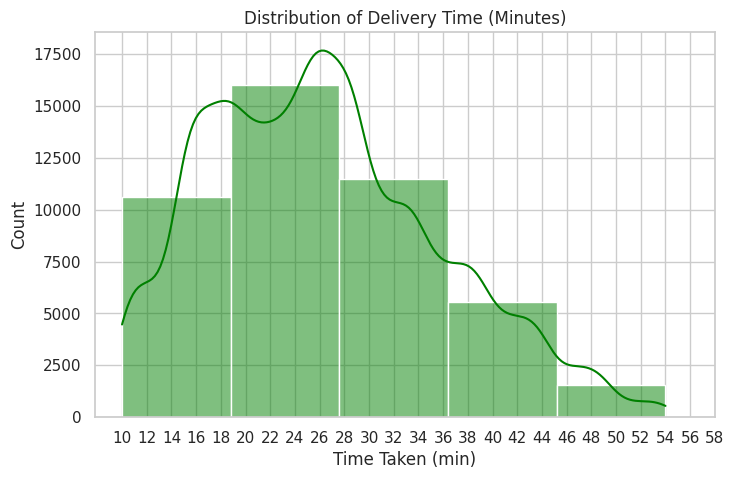

In [8]:
import numpy as np

plt.figure(figsize=(8,5))
sns.histplot(df_clean["Time_taken(min)"], bins=5, kde=True, color="green")

plt.xticks(np.arange(10, 60, 2))

plt.title("Distribution of Delivery Time (Minutes)")
plt.xlabel("Time Taken (min)")
plt.ylabel("Count")
plt.show()


In [9]:
order_stats = (
    df_clean.groupby("Type_of_order")["Time_taken(min)"]
            .mean()
            .reset_index()
            .sort_values("Time_taken(min)")
)

order_stats


,Type_of_order,Time_taken(min)
1,drinks,26.193408
3,snack,26.276076
0,buffet,26.292297
2,meal,26.429492


/tmp/ipython-input-2071259658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=order_stats, x="Type_of_order", y="Time_taken(min)", palette="Blues_d")


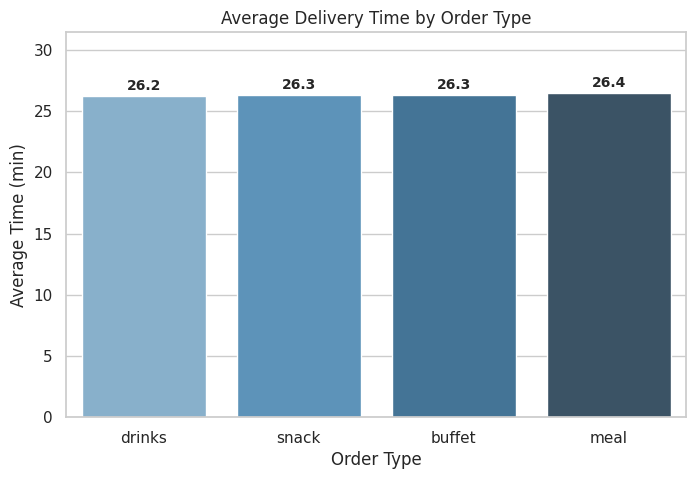

In [10]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=order_stats, x="Type_of_order", y="Time_taken(min)", palette="Blues_d")


for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,
            p.get_height()+0.5,
            format(p.get_height(), ".1f"),
            ha='center', fontsize=10, weight='bold')

plt.title("Average Delivery Time by Order Type")
plt.xlabel("Order Type")
plt.ylabel("Average Time (min)")
plt.ylim(0, order_stats["Time_taken(min)"].max() + 5)
plt.show()


In [11]:
driver_stats = (
    df_clean.groupby("Delivery_person_ID")["Time_taken(min)"]
            .mean()
            .reset_index()
            .sort_values("Time_taken(min)")
)


fastest = driver_stats.head(10)
fastest


,Delivery_person_ID,Time_taken(min)
860,kolres06del03,19.444444
479,dehres20del03,19.600000
468,dehres17del01,19.750000
845,kolres01del03,19.818182
723,knpres01del01,20.000000
284,bhpres15del03,20.142857
952,ludhres18del02,20.200000
497,goares05del03,20.750000
959,ludhres20del03,21.000000
827,kocres16del03,21.000000


In [12]:

slowest = driver_stats.tail(10)
slowest


,Delivery_person_ID,Time_taken(min)
448,dehres09del02,32.083333
738,knpres06del01,32.142857
112,alhres18del02,32.153846
60,alhres010del01,32.214286
506,goares08del03,32.400000
895,kolres19del02,32.454545
851,kolres03del03,33.600000
48,agrres17del01,33.666667
759,knpres14del01,34.166667
93,alhres12del01,35.000000


/tmp/ipython-input-1566862235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


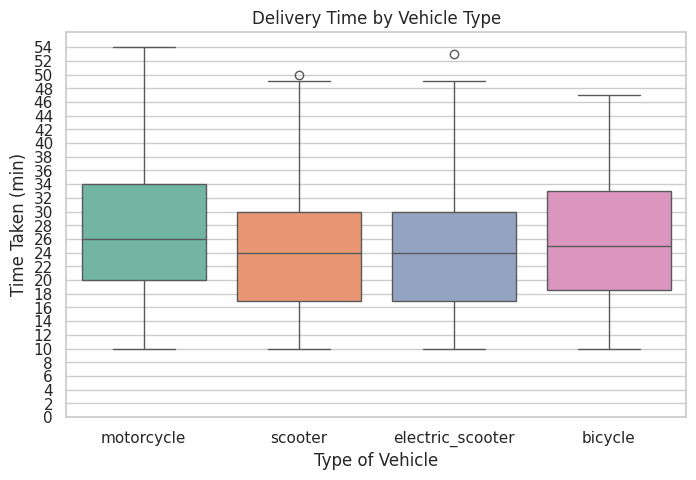

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_clean,
    x="Type_of_vehicle",
    y="Time_taken(min)",
    palette="Set2"
)

plt.title("Delivery Time by Vehicle Type")
plt.xlabel("Type of Vehicle")
plt.ylabel("Time Taken (min)")

# Customize y-axis ticks
plt.yticks(np.arange(0, df_clean["Time_taken(min)"].max() + 2, 2))  # ticks every 5 minutes

plt.show()


ML Dataset Shape: (45162, 12)
Feature Columns: ['distance_km', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Type_of_order_drinks', 'Type_of_order_meal', 'Type_of_order_snack', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter']

 Linear Regression Results
MAE: 6.315493345222073
R²: 0.2937846791223834

 Random Forest Results
MAE: 6.064079678903823
R²: 0.327811292087797


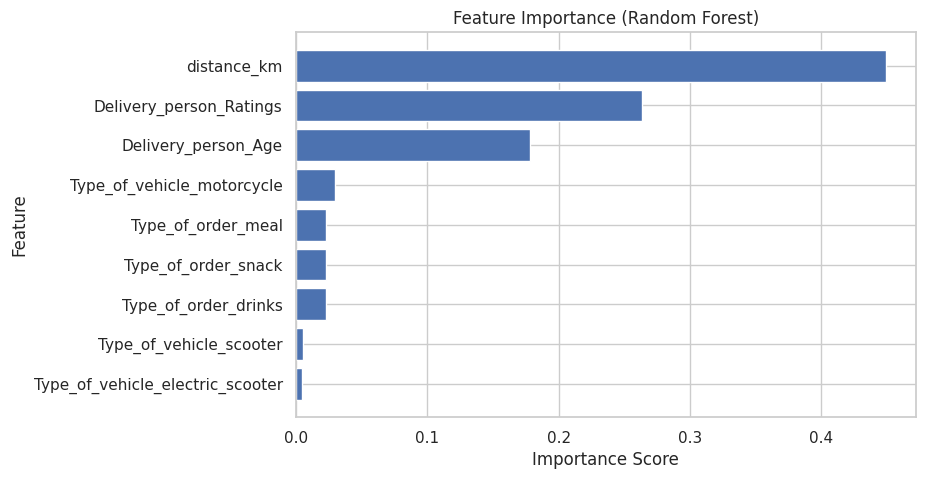


 Machine Learning section completed!


In [15]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


print("ML Dataset Shape:", df_clean.shape)
df_ml = df_clean.copy()



df_ml = pd.get_dummies(
    df_ml,
    columns=["Type_of_order", "Type_of_vehicle"],
    drop_first=True
)


X = df_ml[[
    "distance_km",
    "Delivery_person_Age",
    "Delivery_person_Ratings"
] + [col for col in df_ml.columns if col.startswith("Type_of_")]]

y = df_ml["Time_taken(min)"]

print("Feature Columns:", list(X.columns))



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)



lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("\n Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("R²:", r2_score(y_test, lr_preds))



rf = RandomForestRegressor(
    n_estimators=250,
    random_state=42
)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("\n Random Forest Results")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("R²:", r2_score(y_test, rf_preds))



importances = rf.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8,5))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\n Machine Learning section completed!")
